##  Lab 1: Basic classification algorithms using Scikit-learn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# supress warnings
import warnings 
warnings.filterwarnings('ignore')

#### 1. Завантажити дані, вивести назви колонок і розмір датасета

#### Data dictionary

**Bank client data:**  
**1) age:** (numeric)  
**2) job:** type of job (categorical: "admin.", "blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed", "services", "student", "technician", "unemployed", "unknown")  
**3) marital:** marital status (categorical: "divorced", "married", "single", "unknown"; note: "divorced" means divorced or widowed)  
**4) education:** (categorical: "basic.4y", "basic.6y", "basic.9y", "high.school", "illiterate", "professional.course", "university.degree", "unknown")  
**5) default:** has credit in default? (categorical: "no", "yes", "unknown")  
**6) housing:** has housing loan? (categorical: "no", "yes", "unknown")  
**7) loan:** has personal loan? (categorical: "no", "yes", "unknown")  

**Related with the last contact of the current campaign:**  
**8) contact:** contact communication type (categorical: "cellular", "telephone")  
**9) month:** last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")  
**10) day_of_week:** last contact day of the week (categorical: "mon", "tue", "wed", "thu", "fri")  
**11) duration:** last contact duration in seconds (numeric).  
Important note: this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call, y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**Other attributes:**  
**12) campaign:** number of contacts performed during this campaign and for this client (numeric, includes last contact)  
**13) pdays:** number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)  
**14) previous:** number of contacts performed before this campaign and for this client (numeric)  
**15) poutcome:** outcome of the previous marketing campaign (categorical: "failure", "nonexistent", "success")  

**Social and economic context attributes:**  
**16) emp.var.rate:** employment variation rate - quarterly indicator (numeric)  
**17) cons.price.idx:** consumer price index - monthly indicator (numeric)  
**18) cons.conf.idx:** consumer confidence index - monthly indicator (numeric)  
**19) euribor3m:** euribor 3-month rate - daily indicator (numeric)  
**20) nr.employed:** number of employees - quarterly indicator (numeric)  

**Output variable (desired target):**  
**21) y:** has the client subscribed to a term deposit? (binary: "yes", "no")


#### Loading data

In [3]:
bank_data = pd.read_csv(r"C:\Users\koly\Pr_1\bank-additional-full.csv", sep=';')

In [4]:
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [7]:
bank_data.shape

(41188, 21)

### 2. Processing missing values and duplicates + EDA

In [8]:
# check for missing values
bank_data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [9]:
# check for duplicates
bank_data.duplicated().sum()
# df[bank_data.duplicated()]

12

In [10]:
# drop duplicates
bank_data = bank_data.drop_duplicates()

In [11]:
df = bank_data.copy()

### 3. Візуалізувати дані: 
- побудувати графік (heatmap), що відображає кореляції ознак між собою і з цільовою змінною (розміткою) 
- побудувати гістограми розподілу ознак 
- boxplot-и ознак відносно цільової змінної (якщо ознак занадто багато обмежитися декількома)

In [12]:
def analyze_features(df, features, target):
    df_corr = df[features + [target]].copy()
    
    # Convert the target variable to numeric
    if df_corr[target].dtype == 'object':
        df_corr[target] = df_corr[target].apply(lambda x: 1 if x == 'yes' else 0)
    
    # Ensure all columns are of type float
    df_corr = df_corr.astype(float)
    
    # Compute the correlation matrix
    corr = df_corr.corr()
    
    # Heatmap
    plt.figure(figsize=(10, 5))
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title('Heatmap showing correlation between features', fontsize=15)
    plt.show()
    
    # Histograms of feature distributions
    df_corr[features].hist(bins=20, figsize=(15, 10), edgecolor='black')
    plt.suptitle('Histograms of Feature Distributions', fontsize=16)
    plt.show()
    
    # Boxplots of features relative to the target variable
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
    fig.suptitle('Boxplots of Features Relative to the Target Variable', fontsize=16)
    
    for i, feature in enumerate(features):
        sns.boxplot(x=target, y=feature, data=df_corr, ax=axes[i//3, i%3])
        axes[i//3, i%3].set_title(f'{feature} vs {target}')
    
    # Remove the empty subplot
    if len(features) < 6:
        fig.delaxes(axes[1, 2])
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


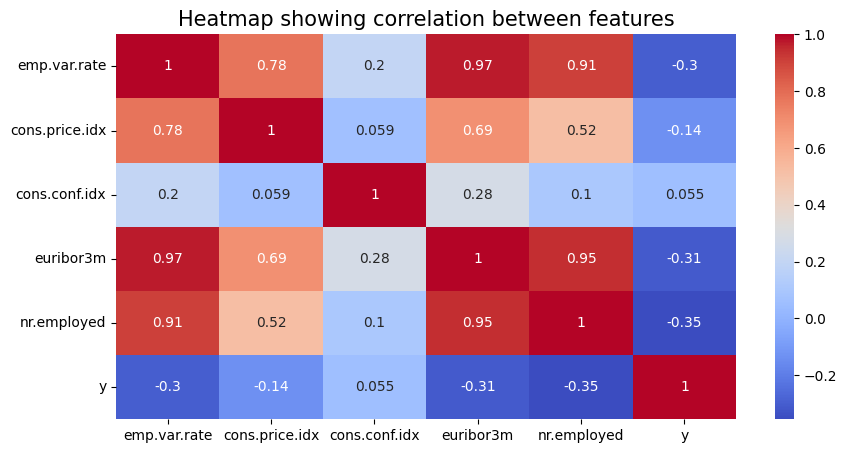

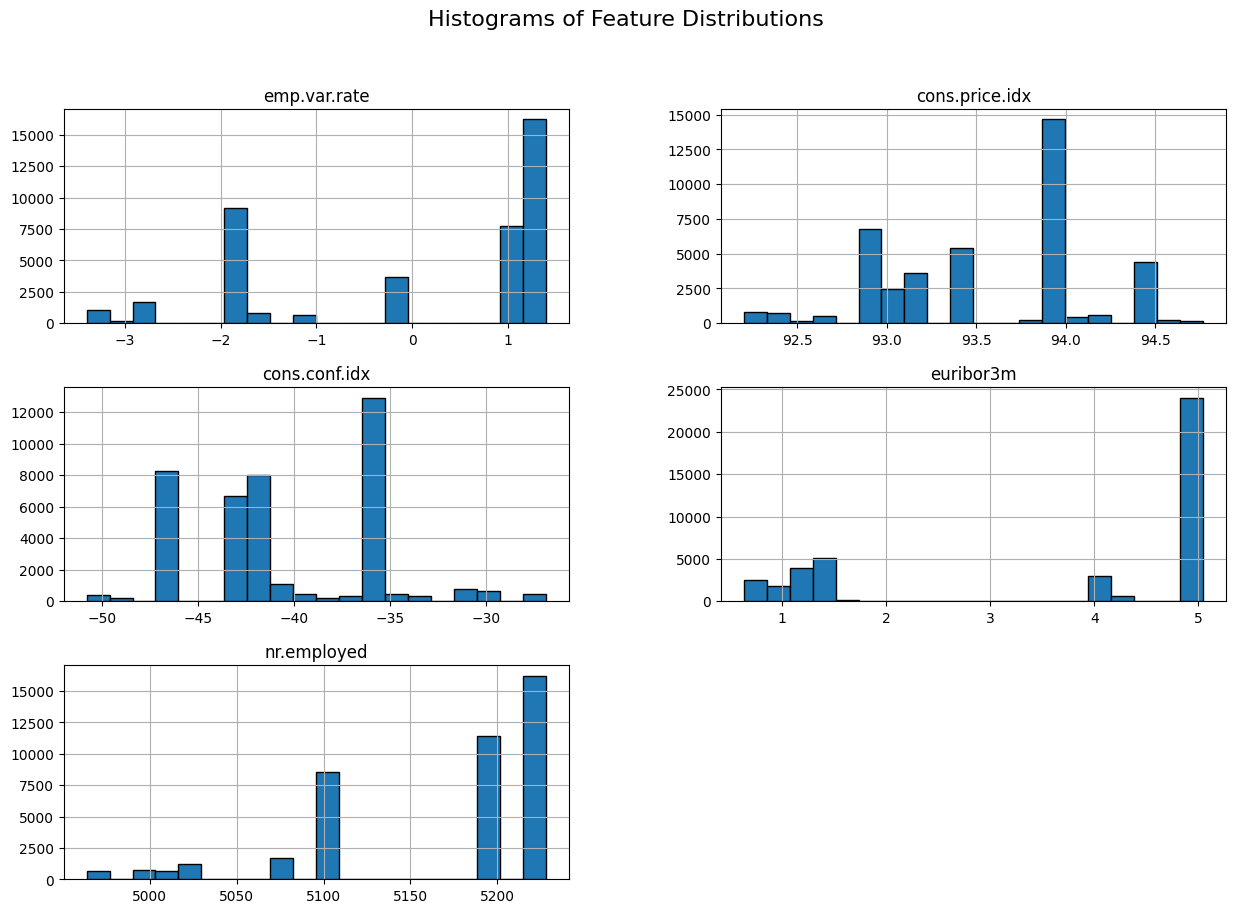

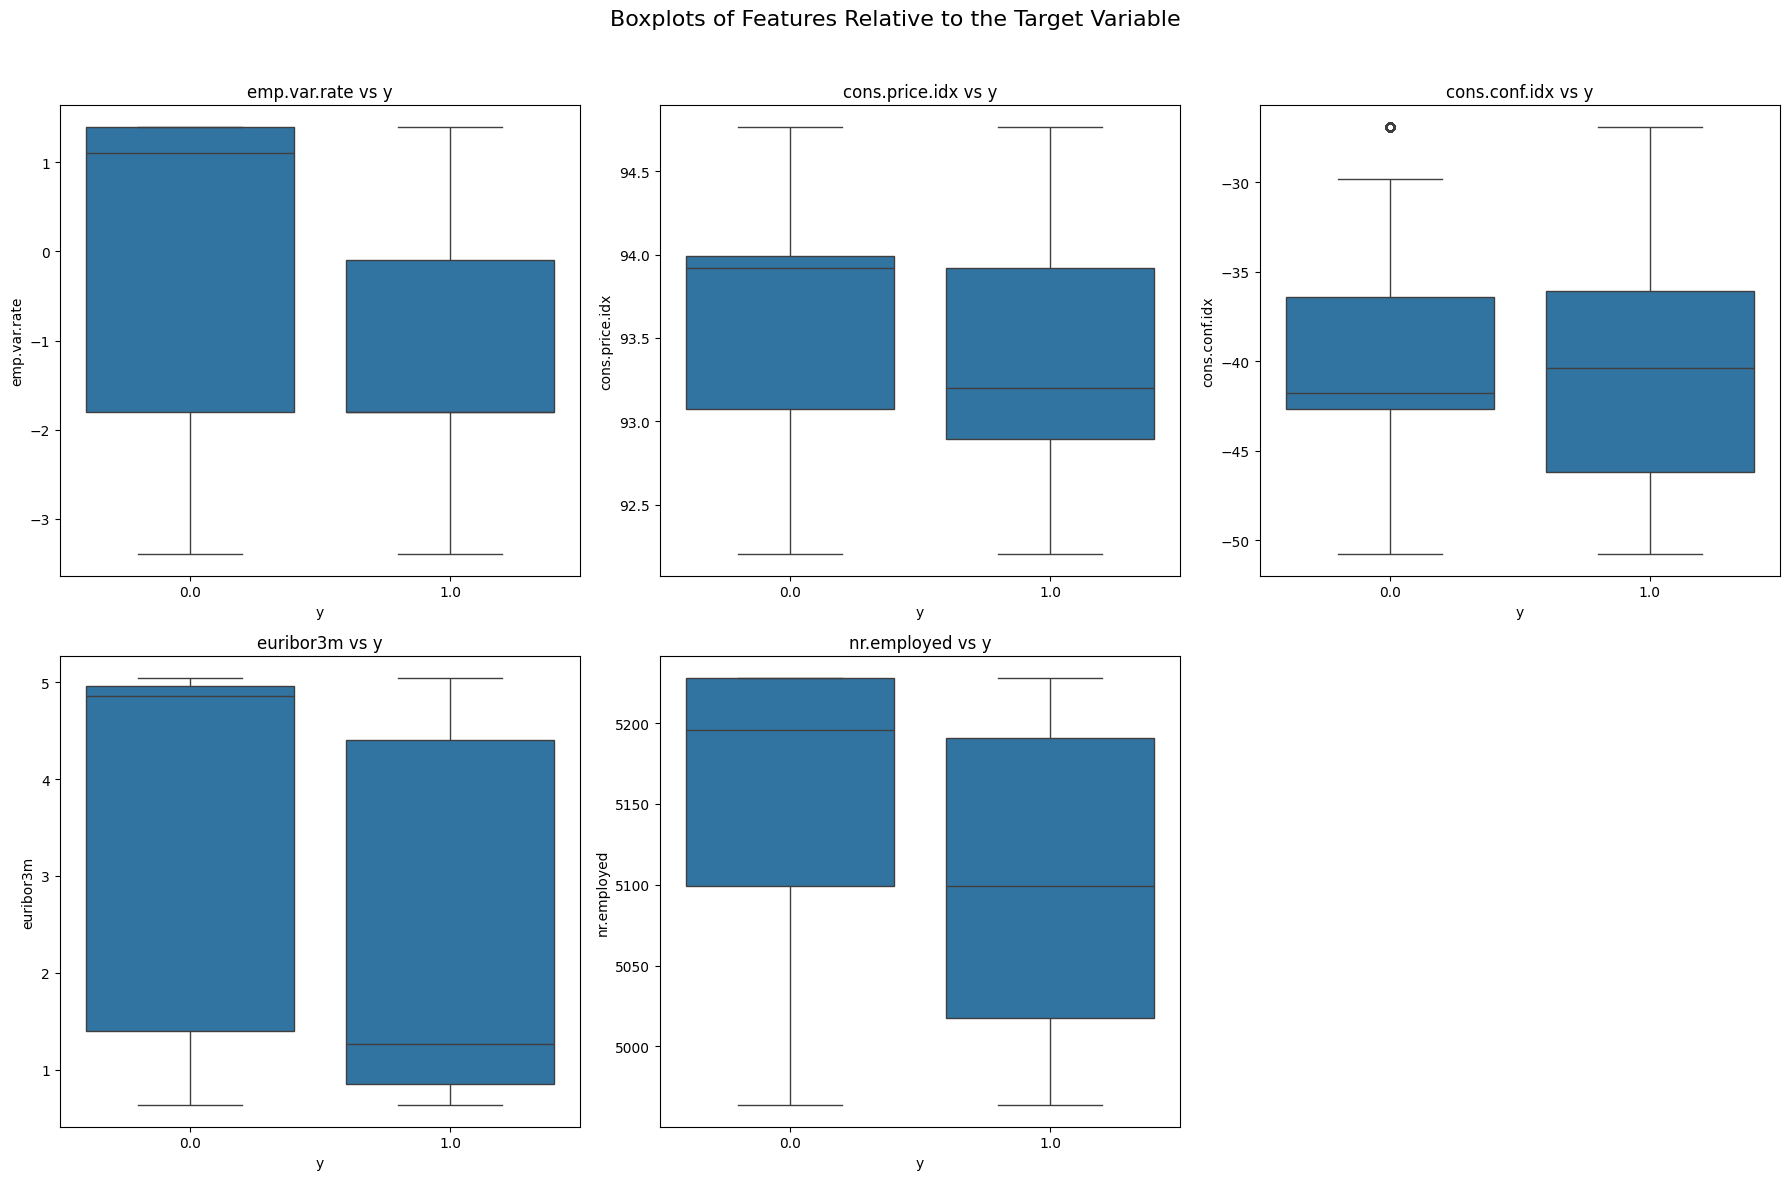

In [13]:
features = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
target = 'y'
analyze_features(df, features, target)

#### 4. Нормалізувати дані

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df[features] = scaler.fit_transform(df[features])

#### 5. Провести навчання наступних класифікаторів:

#### KNN

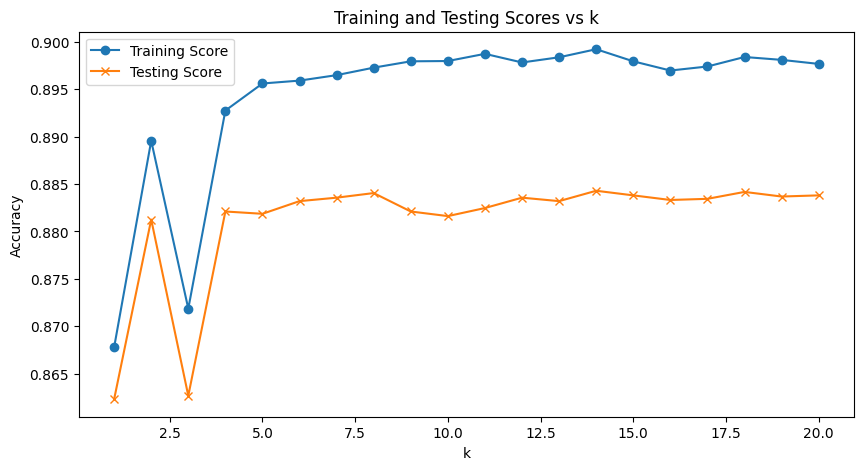

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Create a copy of the DataFrame with the selected features and target
df_clsf = df[features + [target]].copy()

# Convert the target variable to numeric
if df_clsf[target].dtype == 'object':
    df_clsf[target] = df_clsf[target].apply(lambda x: 1 if x == 'yes' else 0)

# Ensure all columns are of type float
df_clsf = df_clsf.astype(float)

# Split the data into training and testing sets
X = df_clsf[features]
y = df_clsf[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the KNN classifier
k_values = range(1, 21)
train_scores = []
test_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    train_score = knn.score(X_train, y_train)
    train_scores.append(train_score)
    
    test_score = knn.score(X_test, y_test)
    test_scores.append(test_score)

# Plot the training and testing scores
plt.figure(figsize=(10, 5))
plt.plot(k_values, train_scores, marker='o', label='Training Score')
plt.plot(k_values, test_scores, marker='x', label='Testing Score')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Training and Testing Scores vs k')
plt.legend()
plt.show()


In [16]:
# Best value of k
best_k = k_values[np.argmax(test_scores)]
print(f'Best value of k: {best_k}')

# Train the KNN classifier with the best value of k

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Display the classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Best value of k: 14
              precision    recall  f1-score   support

         0.0       0.90      0.97      0.94      7265
         1.0       0.52      0.21      0.30       971

    accuracy                           0.88      8236
   macro avg       0.71      0.59      0.62      8236
weighted avg       0.86      0.88      0.86      8236

[[7079  186]
 [ 767  204]]


##### Дерево ухвалення рішень

In [17]:
from sklearn.tree import DecisionTreeClassifier

# Train the Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predict the target variable
y_pred = dt.predict(X_test)

# Display the classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94      7265
         1.0       0.52      0.19      0.28       971

    accuracy                           0.88      8236
   macro avg       0.71      0.58      0.61      8236
weighted avg       0.86      0.88      0.86      8236

[[7094  171]
 [ 786  185]]


##### SVM

In [18]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [19]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

# Initialize the SVM classifier
svm = SVC()

# Initialize GridSearchCV
grid_search = GridSearchCV(svm, param_grid, refit=True, verbose=2, cv=5)

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print(f"Best parameters found: {grid_search.best_params_}")

# Predict the target variable using the best estimator
y_pred = grid_search.best_estimator_.predict(X_test)

# Display the classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   5.9s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   5.7s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   6.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   7.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   9.2s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   9.3s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   9.2s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   6.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   8.3s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   5.6s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   5.8s
[CV] END ......................C=0.1, gamma=0.01

##### Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict the target variable
y_pred = rf.predict(X_test)

# Display the classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.97      0.94      7265
         1.0       0.53      0.21      0.30       971

    accuracy                           0.88      8236
   macro avg       0.71      0.59      0.62      8236
weighted avg       0.86      0.88      0.86      8236

[[7081  184]
 [ 767  204]]


##### AdaBoost

In [21]:
from sklearn.ensemble import AdaBoostClassifier

# Train the AdaBoost classifier
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)

# Predict the target variable
y_pred = ada.predict(X_test)

# Display the classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.99      0.94      7265
         1.0       0.56      0.13      0.22       971

    accuracy                           0.89      8236
   macro avg       0.73      0.56      0.58      8236
weighted avg       0.86      0.89      0.85      8236

[[7162  103]
 [ 841  130]]


In [23]:
best_svm = SVC(C=10, gamma=0.1, kernel='rbf')
best_svm.fit(X_train, y_train)

# Compare the models based on their accuracy
models = {
    'KNN': knn,
    'Decision Tree': dt,
    'SVM': best_svm,
    'Random Forest': rf,
    'AdaBoost': ada
}

# Evaluate the models
best_model_name = None
best_accuracy = 0
best_f1_score = 0

for name, model in models.items():
    print(f"Model: {name}")
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    accuracy = report['accuracy']
    f1_score = report['weighted avg']['f1-score']
    
    print(f"Accuracy: {accuracy}")
    print(f"F1 Score: {f1_score}")
    print(confusion_matrix(y_test, y_pred))
    print("\n")
    
    if accuracy > best_accuracy or (accuracy == best_accuracy and f1_score > best_f1_score):
        best_accuracy = accuracy
        best_f1_score = f1_score
        best_model_name = name

print(f"The best model is: {best_model_name} with Accuracy: {best_accuracy} and F1 Score: {best_f1_score}")

Model: KNN
Accuracy: 0.8842884895580378
F1 Score: 0.8618148160731213
[[7079  186]
 [ 767  204]]


Model: Decision Tree
Accuracy: 0.8838028169014085
F1 Score: 0.8592361799539542
[[7094  171]
 [ 786  185]]


Model: SVM
Accuracy: 0.8857455075279261
F1 Score: 0.8587534254526586
[[7125  140]
 [ 801  170]]


Model: Random Forest
Accuracy: 0.8845313258863526
F1 Score: 0.8619909258717957
[[7081  184]
 [ 767  204]]


Model: AdaBoost
Accuracy: 0.8853812530354541
F1 Score: 0.853023210464322
[[7162  103]
 [ 841  130]]


The best model is: SVM with Accuracy: 0.8857455075279261 and F1 Score: 0.8587534254526586
